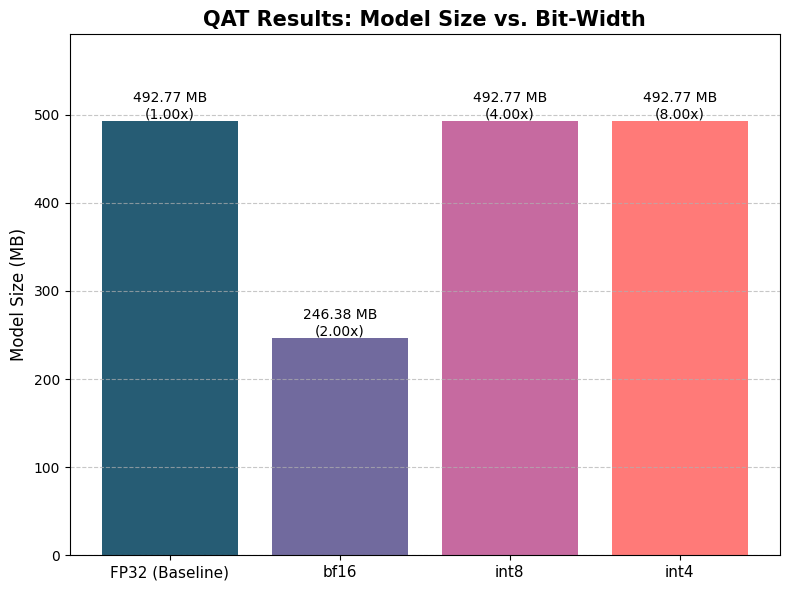

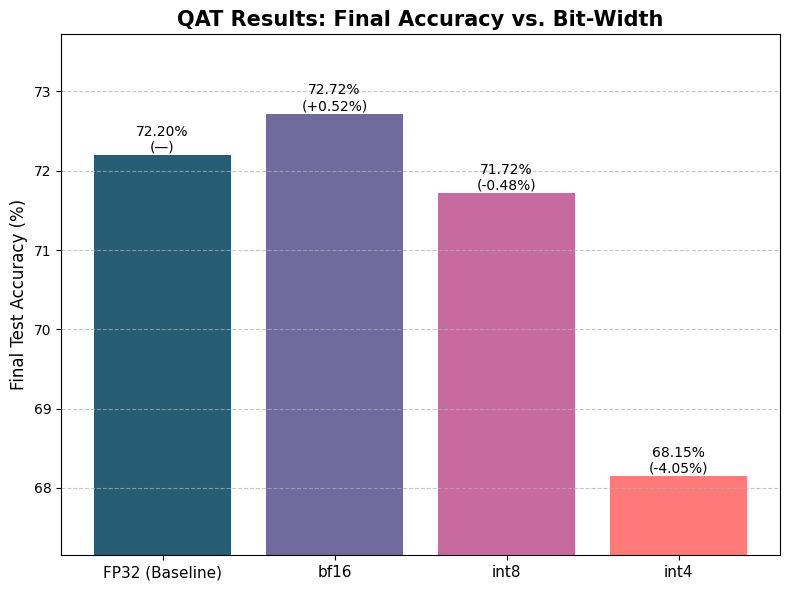

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_qat_results():
    """
    Plots Quantization-Aware Training (QAT) results:
    1. Model Size vs. Bit-Width
    2. Final Accuracy vs. Bit-Width
    """

    # --- Data ---
    labels = ['FP32 (Baseline)', 'bf16', 'int8', 'int4']
    accuracies = [72.20, 72.72, 71.72, 68.15]
    model_sizes = [492.77, 246.38, 492.77, 492.77]
    compression = ['1.00x', '2.00x', '4.00x', '8.00x']
    accuracy_diff = ['—', '+0.52%', '-0.48%', '-4.05%']

    colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361']
    x_pos = np.arange(len(labels))

    # ======================================================
    # Figure 1: Model Size
    # ======================================================
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    bars1 = ax1.bar(x_pos, model_sizes, color=colors, alpha=0.85)
    ax1.set_ylabel('Model Size (MB)', fontsize=12)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, fontsize=11)
    ax1.set_title('QAT Results: Model Size vs. Bit-Width', fontsize=15, fontweight='bold')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Label bars
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2.0,
            height,
            f'{height:.2f} MB\n({compression[i]})',
            ha='center', va='bottom', fontsize=10
        )
    ax1.set_ylim(0, max(model_sizes)*1.2)

    plt.tight_layout()
    plt.savefig('qat_model_size_vs_bitwidth.png', dpi=300, bbox_inches='tight')
    plt.show()

    # ======================================================
    # Figure 2: Accuracy
    # ======================================================
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    bars2 = ax2.bar(x_pos, accuracies, color=colors, alpha=0.85)
    ax2.set_ylabel('Final Test Accuracy (%)', fontsize=12)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(labels, fontsize=11)
    ax2.set_title('QAT Results: Final Accuracy vs. Bit-Width', fontsize=15, fontweight='bold')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

    # Add accuracy labels
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width()/2.0,
            height,
            f'{height:.2f}%\n({accuracy_diff[i]})',
            ha='center', va='bottom', fontsize=10
        )

    # Slightly tighten y-limits
    min_acc, max_acc = min(accuracies), max(accuracies)
    ax2.set_ylim(min_acc - 1.0, max_acc + 1.0)

    plt.tight_layout()
    plt.savefig('qat_final_accuracy_vs_bitwidth.png', dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    plot_qat_results()
